# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Clustering and dimension-reduction
### VIDEO: ICA
#### TEACHER: Mike X Cohen, sincxpress.com

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

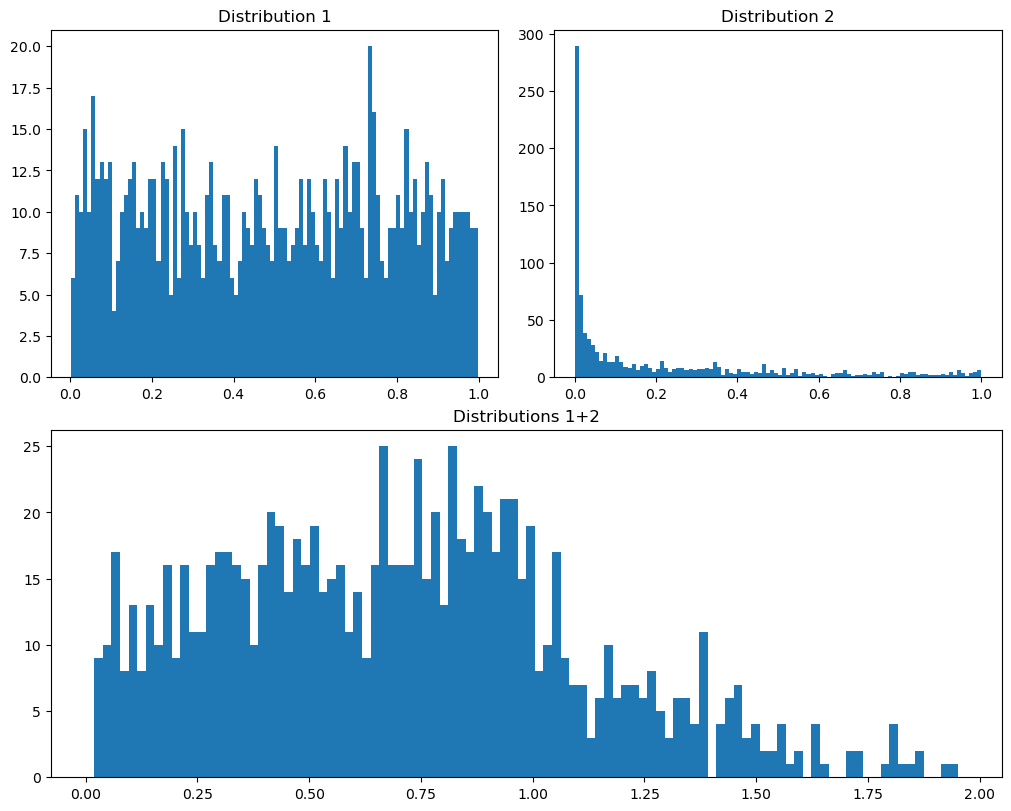

In [4]:
## Create the data

#number of data points
N = 1000

#a non-Gaussian distribution
dist1 = np.random.rand(N)

# another non-Gaussian distribution
dist2 = np.random.rand(N)**4


# setup the figure
fig = plt.figure(constrained_layout=False,figsize=(10,8))
axs = fig.add_gridspec(2,2)


# individual distributions
ax1 = fig.add_subplot(axs[0,0])
ax1.hist(dist1,100)
ax1.set_title('Distribution 1')

ax2 = fig.add_subplot(axs[0,1])
ax2.hist(dist2,100)
ax2.set_title('Distribution 2')

# and their summed histogram
ax3 = fig.add_subplot(axs[1,:])
ax3.hist(dist1+dist2,100)
ax3.set_title('Distributions 1+2')

plt.show()

/Users/antonis/miniforge3/envs/dfl_test/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


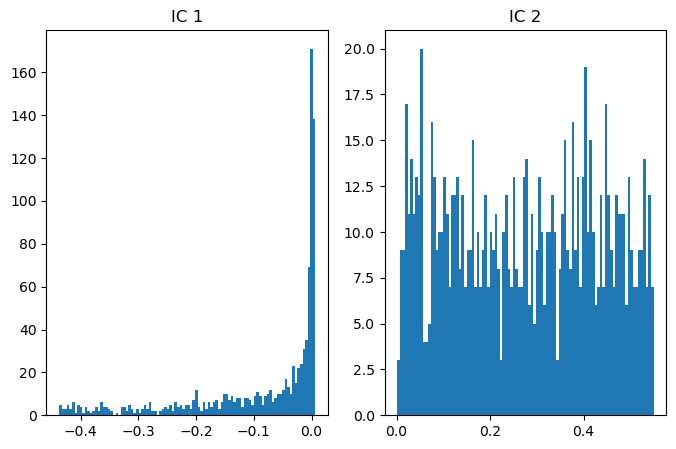

In [7]:
## ICA

# two non-Gaussian distributions
data = np.vstack((.4*dist1+.3*dist2, .8*dist1-.7*dist2))
#linearly randomly combining those dataset in a different mixed dataset.

# ICA and scores
fastica = FastICA(max_iter=10000,tol=.0000001)
b = fastica.fit_transform(data)
iscores = b@data


# plot distributions

# IC 1
fig,ax = plt.subplots(1,2,figsize=(8,5))
ax[0].hist(iscores[0,:],100)
ax[0].set_title('IC 1')

# IC 2
ax[1].hist(iscores[1,:],100)
ax[1].set_title('IC 2')


plt.show()

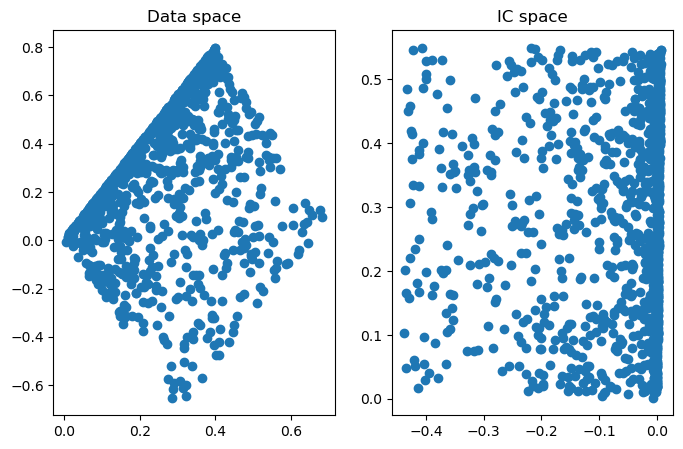

In [10]:
## look at the data in data space and IC space

fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].plot(data[0,:],data[1,:],'o')
ax[0].set_title('Data space')

ax[1].plot(iscores[0,:],iscores[1,:],'o')
ax[1].set_title('IC space')
plt.show()

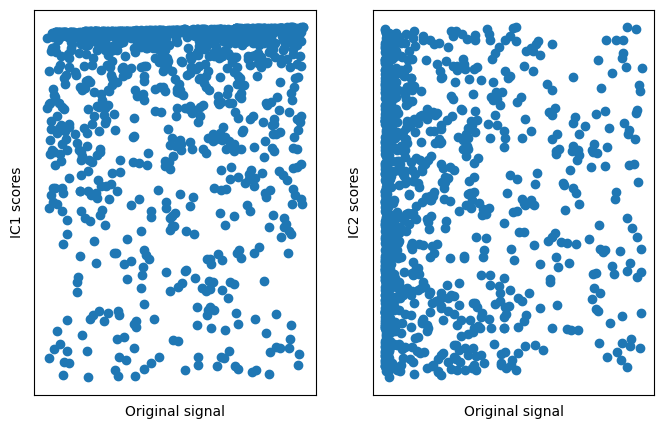

In [11]:
## show that the original data match the ICs

# now plot data as a function of ICs
fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].plot(dist1,iscores[0,:],'o')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Original signal')
ax[0].set_ylabel('IC1 scores')

ax[1].plot(dist2,iscores[1,:],'o')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('Original signal')
ax[1].set_ylabel('IC2 scores')
plt.show()